## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, f1_score

## Fetching Data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Divits0/Water-Potability-Prediction/main/water_potability.csv")
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

## Data Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Data Statistics

In [4]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

## Check Imbalance with respect to target in data

In [5]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

## Check for missing values

In [6]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
data.shape

(3276, 10)

## Feature Engineering using correlation matrix

<AxesSubplot:>

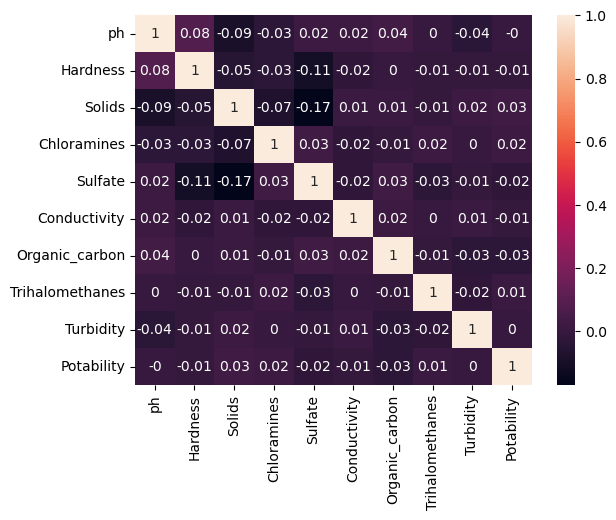

In [8]:
sns.heatmap(round(data.corr(),2),annot=True)

## Data Analysis

In [37]:
fig = make_subplots(rows=3, cols=4, subplot_titles=('ph',  'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                                                    'Conductivity', 'Organic_carbon', 'Trihalomethanes',
                                                    'Turbidity'),vertical_spacing=0.05)

fig.add_trace(
    go.Histogram(x=data['ph'],
    name='ph'
),row=1, col=1)

fig.add_trace(
    go.Histogram(x=data['Hardness'],
    name='Hardness'
),row=1, col=2)

fig.add_trace(
    go.Histogram(x=data['Solids'],
    name='Solids'
),row=1, col=3)

fig.add_trace(
    go.Histogram(x=data['Chloramines'],
    name='Chloramines'
),row=1, col=4)

fig.add_trace(
    go.Histogram(x=data['Sulfate'],
    name='Sulfate'
),row=2, col=1)

fig.add_trace(
    go.Histogram(x=data['Conductivity'],
    name='Conductivity'
),row=2, col=2)

fig.add_trace(
    go.Histogram(x=data['Organic_carbon'],
    name='Organic_carbon'
),row=2, col=3)

fig.add_trace(
    go.Histogram(x=data['Trihalomethanes'],
    name='Trihalomethanes'
),row=2, col=4)

fig.add_trace(
    go.Histogram(x=data['Turbidity'],
    name='Turbidity'
),row=3, col=1)



fig.update_layout(height=1800, width=1000, title_text="Histogram")
fig.show()

In [39]:
fig = make_subplots(rows=3, cols=4, subplot_titles=('ph',  'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                                                    'Conductivity', 'Organic_carbon', 'Trihalomethanes',
                                                    'Turbidity'),vertical_spacing=0.05)

fig.add_trace(
    go.Box(
      y=data['ph'],
      x=data['Potability'],
      name='ph',
      marker_color='green'
),row=1, col=1)

fig.add_trace(
    go.Box(
      y=data['Hardness'],
      x=data['Potability'],
      name='Hardness',
      marker_color='brown'
),row=1, col=2)

fig.add_trace(
    go.Box(
      y=data['Solids'],
      x=data['Potability'],
      name='Solids',
      marker_color='red'
),row=1, col=3)

fig.add_trace(
    go.Box(
      y=data['Chloramines'],
      x=data['Potability'],
      name='Chloramines',
      marker_color='blue'
),row=1, col=4)

fig.add_trace(
    go.Box(
      y=data['Sulfate'],
      x=data['Potability'],
      name='Sulfate',
      marker_color='darkgray'
),row=2, col=1)

fig.add_trace(
    go.Box(
      y=data['Conductivity'],
      x=data['Potability'],
      name='Conductivity',
      marker_color='orange'
),row=2, col=2)

fig.add_trace(
    go.Box(
      y=data['Organic_carbon'],
      x=data['Potability'],
      name='Organic_carbon',
      marker_color='violet'
),row=2, col=3)

fig.add_trace(
    go.Box(
      y=data['Trihalomethanes'],
      x=data['Potability'],
      name='Trihalomethanes',
      marker_color='indigo'
),row=2, col=4)

fig.add_trace(
    go.Box(
      y=data['Turbidity'],
      x=data['Potability'],
      name='Turbidity',
      marker_color='darkcyan'
),row=3, col=1)



fig.update_layout(height=2400, width=1000, title_text="Box Plots")
fig.show()

## Treating Outliers using z-score

In [11]:
from scipy import stats
z_scores = stats.zscore(data)
z_scores
((z_scores < -2.5) | (z_scores > 2.5))
new_data = data.mask((z_scores < -2.5) | (z_scores > 2.5), np.nan)
new_data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

## Using Imputation to handle missing data

In [12]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(new_data)
imputed_data = pd.DataFrame(imp_mean.transform(new_data),columns=data.columns)

In [13]:
imputed_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Using sampling Technique to treat data properly

In [14]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class

df_majority = imputed_data[imputed_data['Potability']==0]
df_minority = imputed_data[imputed_data['Potability']==1]

# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 1998, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

## Splitting data into traing and testing set

In [15]:
upx = df_upsampled.iloc[:, :-1].values
upy = df_upsampled.iloc[:,-1].values
from sklearn.model_selection import train_test_split
upx_train, upx_test, upy_train, upy_test = train_test_split(upx, upy, train_size=0.8, random_state = 42)

In [16]:
pip install xgboost

## Data Modeling

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import pickle

models = [LogisticRegression(random_state=42),GaussianNB(),svm.SVC(random_state=42),KNeighborsClassifier(),RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42)
          ,XGBClassifier(random_state=42)]

models_names = ['LogisticRegression','GaussianNB','SVC'\
                ,'KNeighborsClassifier','RandomForestClassifier',\
                'GradientBoostingClassifier','XGBClassifier']

z=0
Recall=[]
Specificity=[]
Accuracy=[]
Precision=[]
F1_Score=[]
for model in models:
    print(model)
    model.fit(upx_train,upy_train)
    pickle.dump(model , open(str(models_names[z])[:-2]+'.pk1' , 'wb'))
    upy_pred=model.predict(upx_test)
    print(classification_report(upy_test,upy_pred))
    cm_test = confusion_matrix(upy_test, upy_pred)
    print("--------------------------------------------------------------------------")
    print("Recall on Test Data: ", round(recall_score(upy_test, upy_pred), 4))
    Recall.append(round(recall_score(upy_test, upy_pred), 4))
    print("Specificity on Test Data: ", round((cm_test[0,0]/(cm_test[0,0] + cm_test[0,1])),4))
    Specificity.append(round((cm_test[0,0]/(cm_test[0,0] + cm_test[0,1])),4))
    print("Accuracy on Test Data: ", round(accuracy_score(upy_test, upy_pred), 4))
    Accuracy.append(round(accuracy_score(upy_test, upy_pred), 4))
    print("Precision on Test Data: ", round(precision_score(upy_test, upy_pred), 4))
    Precision.append(round(precision_score(upy_test, upy_pred), 4))
    print("F1 Score Test Data: ", round(f1_score(upy_test, upy_pred), 4))
    F1_Score.append(round(f1_score(upy_test, upy_pred), 4))
    print("--------------------------------------------------------------------------")
    z=z+1

LogisticRegression(random_state=42)
              precision    recall  f1-score   support

         0.0       0.48      0.56      0.52       385
         1.0       0.52      0.44      0.48       415

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800

--------------------------------------------------------------------------
Recall on Test Data:  0.4434
Specificity on Test Data:  0.5558
Accuracy on Test Data:  0.4975
Precision on Test Data:  0.5183
F1 Score Test Data:  0.4779
--------------------------------------------------------------------------
GaussianNB()
              precision    recall  f1-score   support

         0.0       0.53      0.70      0.60       385
         1.0       0.60      0.42      0.49       415

    accuracy                           0.56       800
   macro avg       0.57      0.56      0.55       800
weighted avg       0.57      0.56      0.55     

C:\Users\hasik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



              precision    recall  f1-score   support

         0.0       0.79      0.84      0.82       385
         1.0       0.85      0.79      0.82       415

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800

--------------------------------------------------------------------------
Recall on Test Data:  0.7904
Specificity on Test Data:  0.8442
Accuracy on Test Data:  0.8162
Precision on Test Data:  0.8454
F1 Score Test Data:  0.8169
--------------------------------------------------------------------------
GradientBoostingClassifier(random_state=42)
              precision    recall  f1-score   support

         0.0       0.65      0.74      0.69       385
         1.0       0.72      0.62      0.67       415

    accuracy                           0.68       800
   macro avg       0.68      0.68      0.68       800
weighted avg       0.68      0.68      0.68       800

## Use of Grid Search CV

In [18]:
from sklearn.model_selection import GridSearchCV
grid2 = {'n_estimators': [100,150,200,250,300,170], 'criterion': ['log_loss']}

rf = RandomForestClassifier(random_state = 42)
rf_cv = GridSearchCV(rf, grid2, cv = 5)
rf_cv.fit(upx_train, upy_train)

print("Best Parameters: ", rf_cv.best_params_)
print("Accuracy: ", rf_cv.best_score_)

C:\Users\hasik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hasik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hasik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\hasik\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hasik\anaconda3\lib\site-packages\j

KeyError: 'log_loss'

In [19]:
imputed_data

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.036752  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.073546   
2     8.099124  224.236259  19909.541732     9.275884  333.073546   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  20626.515937     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.073546   
3273  9.419510  175.762646  33155.578218     7.350233  333.073546   
3274  5.126763  230.603758  11983.869376     6.303357  333.073546   
3275  7.874671  195.102299  17404.177061     7.509306  333.073546   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135         0.0  
1       592.885359       15.180013        56.329076   4.500656         0.0  
2       418.606213       16.868637        66.420093   3.055934         0.0  
3       363.266516       18.436524       100.341674   4.628771         0.0  
4       398.410813       11.558279        31.997993   4.075075         0.0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821         1.0  
3272    392.449580       19.903225        66.622485   2.798243         1.0  
3273    432.044783       11.039070        69.845400   3.298875         1.0  
3274    402.883113       11.168946        77.488213   4.708658         1.0  
3275    327.459760       16.140368        78.698446   2.309149         1.0  

[3276 rows x 10 columns]

## Using Hyper Parameters on best model

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200,criterion='log_loss',random_state=42)
classifier.fit(upx_train, upy_train)
upy_pred = classifier.predict(upx_tes t)
print(classification_report(upy_test,upy_pred))

KeyError: 'log_loss'

In [28]:
input_data = (8.316765884214679,
214.37339408562252,
22018.417440775294,
8.05933237743854,
356.88613564305666,
363.2665161642437,
18.436524495493302,
100.34167436508008,
4.628770536837084)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The water is not potable')
else:
  print('The water is potable')

[0]
The water is not potable
